In [12]:
import create_deep_network
import S_to_neural_net
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import array_to_latex as a2l

# Initialize function and W

In [13]:
m=100
breakpoints=np.linspace(0,1,m+1)
y_breakpoints=np.array([random.randint(-3000,3000)/1000 for _ in range((m+1))])
breakpoints[0],breakpoints[-1]=0,1
W=20

# Draw function

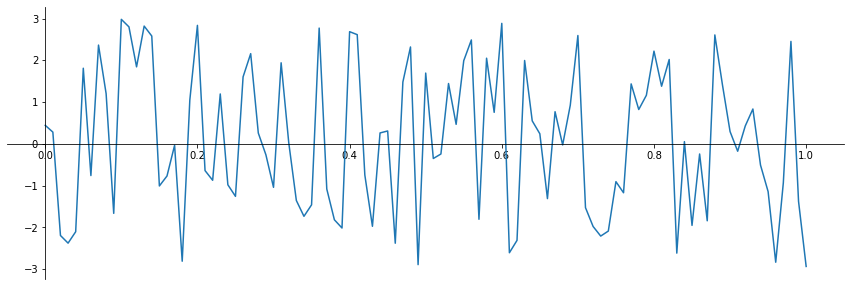

In [14]:
#plt.plot(breakpoints,y_breakpoints)

fig = plt.figure(1,figsize=(15,5)) #initialize figure
ax = fig.add_subplot(1,1,1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.plot(breakpoints,y_breakpoints)
fig.savefig('original graph')
plt.show() 

In [15]:
breakpoints

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [16]:
y_breakpoints

array([ 0.443,  0.281, -2.194, -2.377, -2.104,  1.81 , -0.759,  2.364,
        1.202, -1.664,  2.98 ,  2.8  ,  1.843,  2.819,  2.581, -1.008,
       -0.77 , -0.035, -2.81 ,  1.047,  2.836, -0.64 , -0.872,  1.194,
       -0.98 , -1.257,  1.603,  2.159,  0.259, -0.263, -1.041,  1.94 ,
        0.03 , -1.356, -1.735, -1.46 ,  2.771, -1.082, -1.818, -2.015,
        2.685,  2.614, -0.745, -1.974,  0.261,  0.308, -2.379,  1.479,
        2.319, -2.892,  1.694, -0.351, -0.243,  1.444,  0.467,  1.991,
        2.487, -1.806,  2.05 ,  0.754,  2.884, -2.607, -2.311,  1.995,
        0.55 ,  0.241, -1.311,  0.769, -0.026,  0.924,  2.593, -1.528,
       -1.978, -2.208, -2.088, -0.905, -1.171,  1.435,  0.822,  1.162,
        2.219,  1.379,  2.019, -2.616,  0.053, -1.952, -0.243, -1.842,
        2.607,  1.412,  0.294, -0.177,  0.429,  0.834, -0.508, -1.143,
       -2.834, -0.934,  2.452, -1.377, -2.935])

# Draw dilated function

In [17]:
subs_points,a,b=create_deep_network.create_subfunctions(breakpoints,y_breakpoints,W)
weights_subs=S_to_neural_net.Sk_spline_interpolation(subs_points)

In [19]:
subs_points

[(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
         0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
         0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
         0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
         0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
         0.55]),
  array([ 0.     , -0.12822, -2.56944, -2.71866, -2.41188,  1.5359 ,
         -0.99932,  2.15746,  1.02924, -1.80298,  2.8748 ,  2.72858,
          1.80536,  2.81514,  2.61092, -0.9443 , -0.67252,  0.09626,
         -2.64496,  1.24582,  3.0686 , -0.37362, -0.57184,  1.52794,
         -0.61228, -0.8555 ,  2.03828,  2.62806,  0.76184,  0.27362,
         -0.4706 ,  2.54418,  0.66796, -0.68426, -1.02948, -0.7207 ,
          3.54408, -0.27514, -0.97736, -1.14058,  3.5932 ,  3.55598,
          0.23076, -0.96446,  1.30432,  1.3851 , -1.26812,  2.62366,
          3.49744, -1.67978,  2.94   ,  0.92878,  1.0705

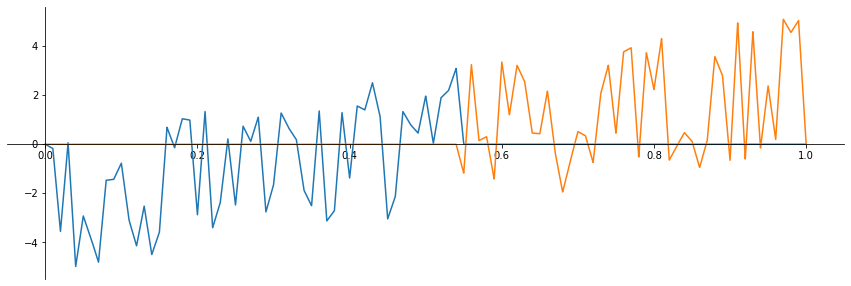

In [7]:
ts=[]
ys=[]

#

for k in range(len(subs_points)):
    t=np.linspace(0,1,10000) #points for x coordinates
    Sk_breaks,Sk_weights,a,b=weights_subs[k]
    breaks_lower,breaks_higher=subs_points[k][0][0],subs_points[k][0][-1]
    
    y=[]
    for x in t:
        if x>=breaks_lower and x<=breaks_higher:
            y.append(S_to_neural_net.evaluation_cpwl_basis_splines(x,Sk_breaks,Sk_weights,a,b))
        else:
            y.append(0)
        
    
    ts.append(t)
    ys.append(y)
fig = plt.figure(1,figsize=(15,5)) #initialize figure
ax = fig.add_subplot(1,1,1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

for k in range(len(ys)):               
    ax.plot(ts[k],ys[k])
fig.savefig('dilated graph')
plt.show() 

# Draw for each subfunction the functions $S_k$ via the Theorem

In [8]:
def subgraphs(weights_Sk,breakpoints,T):

    w_m=copy.copy(weights_Sk)
    L=[3,4,5,6,7,11,13]
    Cols=2
    for k in L:
        if len(w_m)%k==0:
            Cols=k
            break

    Rows = len(w_m)//Cols

    if Rows>1:
        fig, ax = plt.subplots(Rows,Cols,figsize=(15,15))
        t=np.linspace(breakpoints[0],breakpoints[-1],10000) #points for x coordinates
        for k in range(len(w_m)):
            Sk_breaks,Sk_weights,a,b=w_m[k]
            y=np.array([S_to_neural_net.evaluation_cpwl_basis_splines(x,Sk_breaks,Sk_weights,a,b) for x in t]) #y coordinates
            u = y.copy()#two copies for both lines
            l = y.copy()
            u[u < 0] =np.nan #define on which interval the line should appear (-> np.nan = no point on this place!)
            l[l >= 0] =np.nan

            Row=k//Cols
            Column=k%Cols
            ax[Row,Column].spines['right'].set_color('none')
            ax[Row,Column].spines['top'].set_color('none')
            ax[Row,Column].xaxis.set_ticks_position('bottom')
            ax[Row,Column].spines['bottom'].set_position(('data',0))
            ax[Row,Column].yaxis.set_ticks_position('left')

            ax[Row,Column].plot(t,l, linestyle='dotted',color='black')#plot the two lines
            ax[Row,Column].plot(t,u, linestyle='solid',color='black')

        fig.suptitle(T, fontsize=16)
        fig.savefig(T)
        plt.show()
    else:
        fig, ax = plt.subplots(Cols,figsize=(15,15))
        t=np.linspace(breakpoints[0],breakpoints[-1],10000) #points for x coordinates
        for k in range(len(w_m)):
            Sk_breaks,Sk_weights,a,b=w_m[k]
            y=np.array([S_to_neural_net.evaluation_cpwl_basis_splines(x,Sk_breaks,Sk_weights,a,b) for x in t]) #y coordinates
            u = y.copy()#two copies for both lines
            l = y.copy()
            u[u < 0] =np.nan #define on which interval the line should appear (-> np.nan = no point on this place!)
            l[l >= 0] =np.nan

            Row=k//Cols
            Column=k%Cols
            ax[Column].spines['right'].set_color('none')
            ax[Column].spines['top'].set_color('none')
            ax[Column].xaxis.set_ticks_position('bottom')
            ax[Column].spines['bottom'].set_position(('data',0))
            ax[Column].yaxis.set_ticks_position('left')

            ax[Column].plot(t,l, linestyle='dotted',color='black')#plot the two lines
            ax[Column].plot(t,u, linestyle='solid',color='black')

        fig.suptitle(T, fontsize=16)
        fig.savefig(T)
        plt.show()

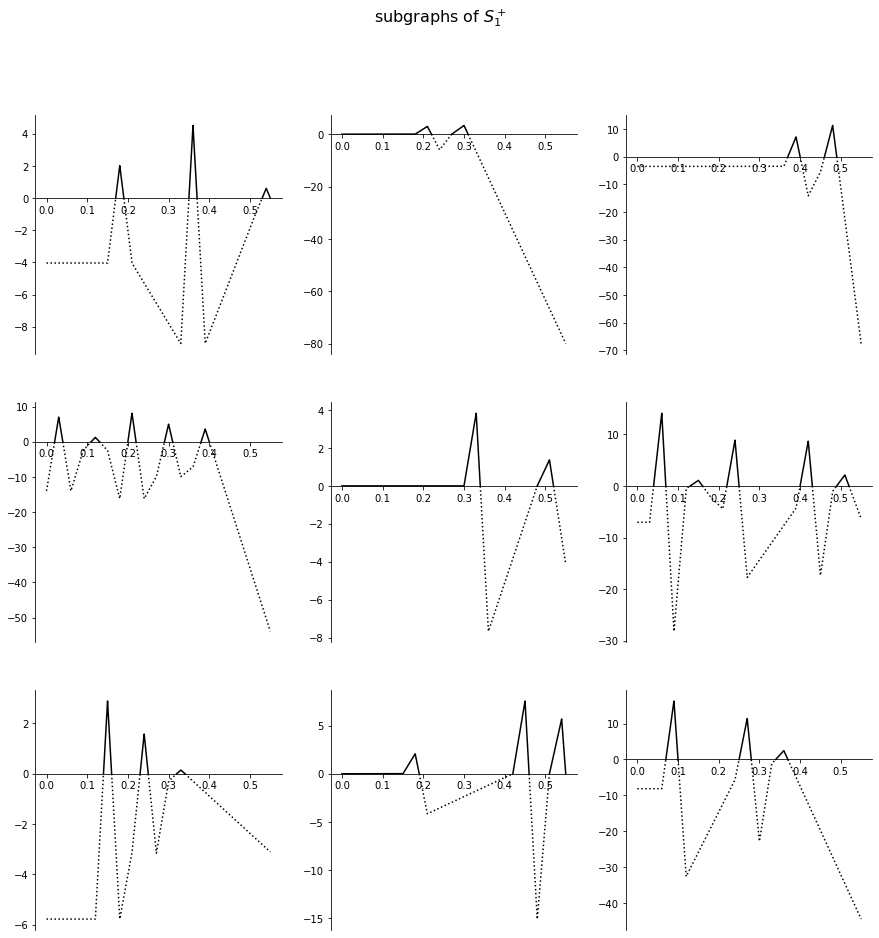

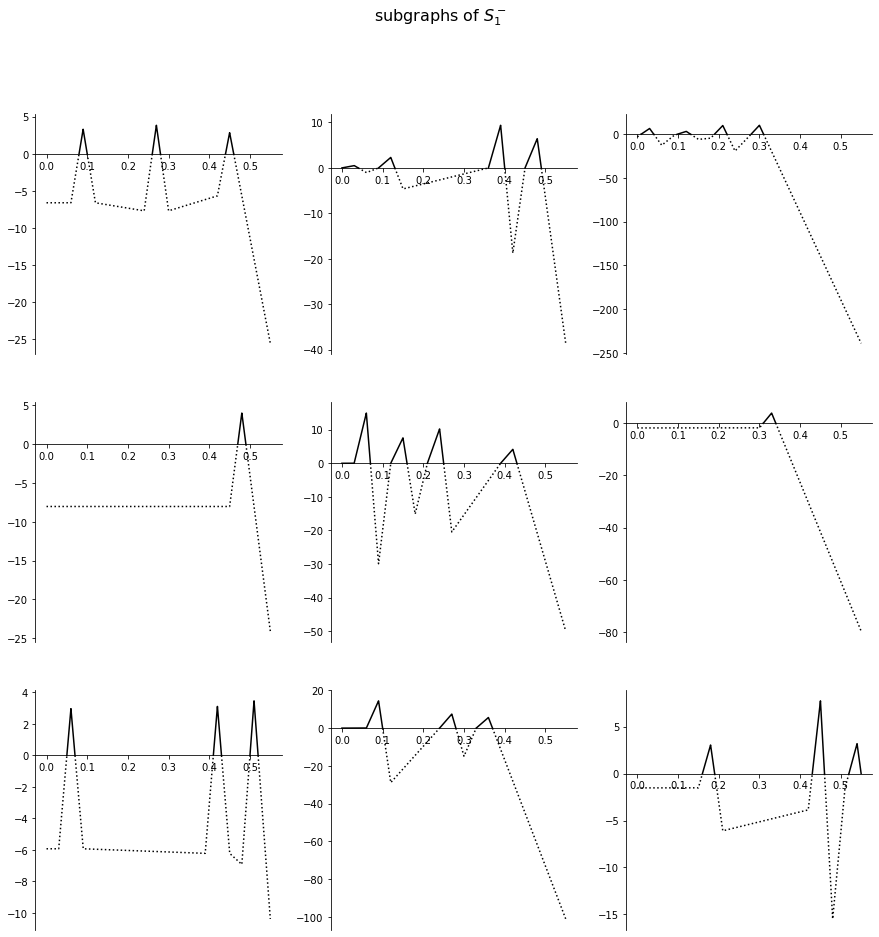

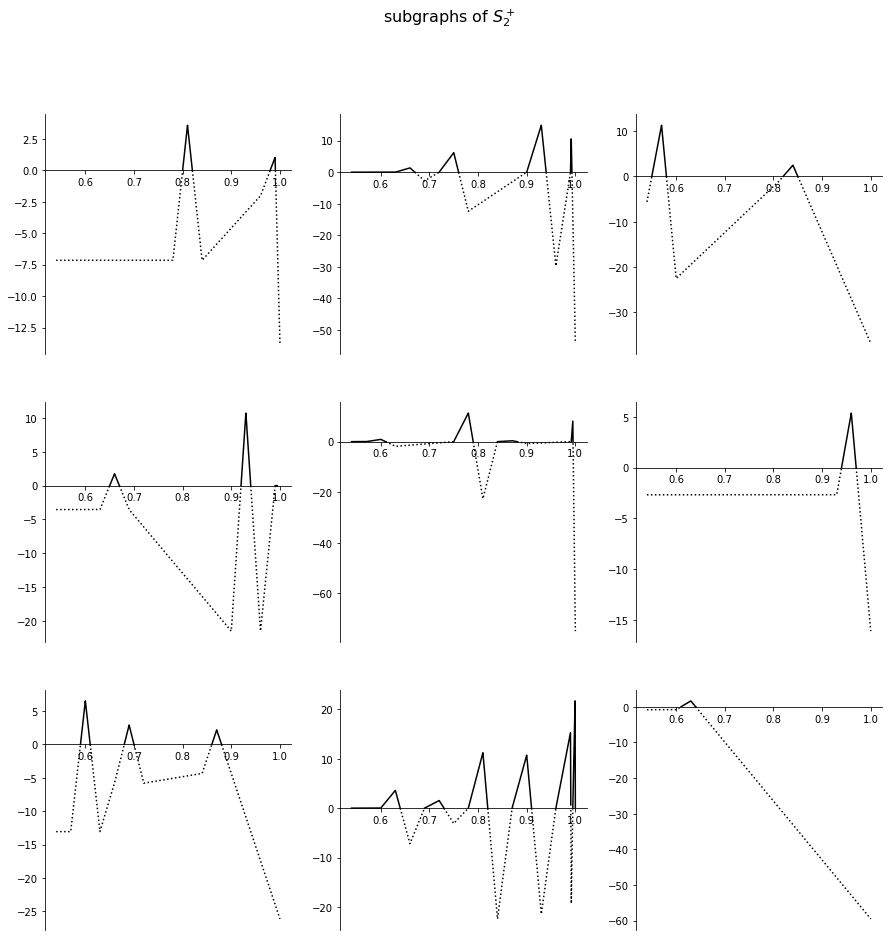

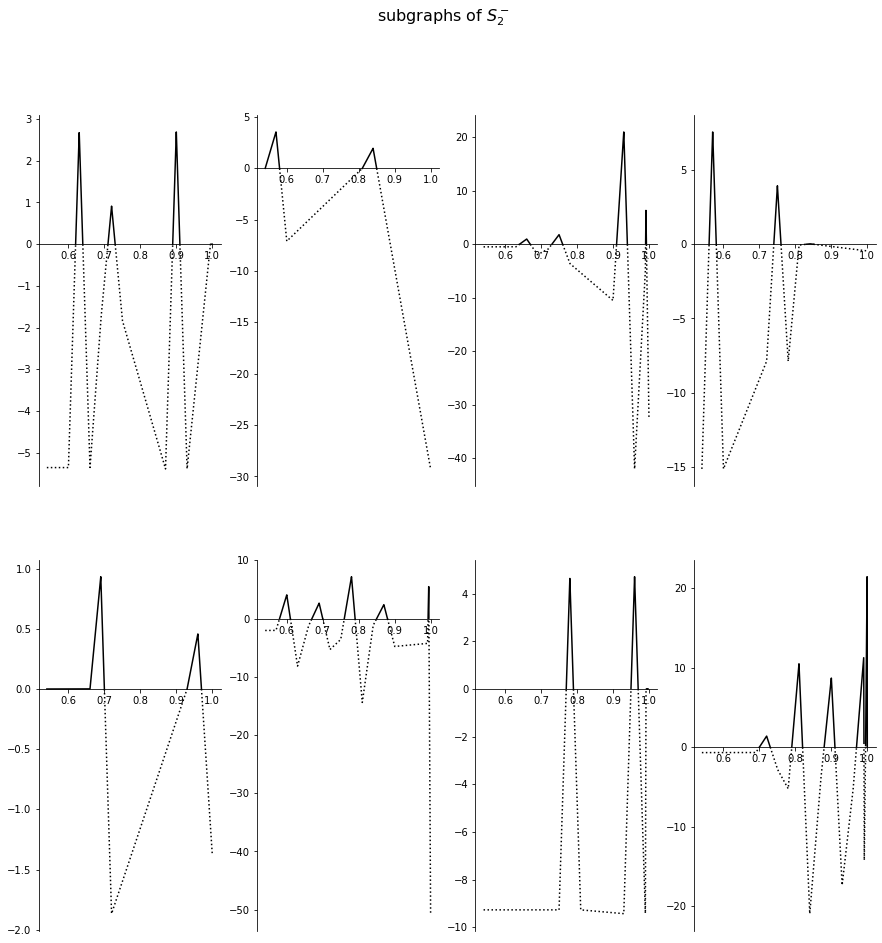

In [9]:
for k in range(len(subs_points)):
    breakpoints_=subs_points[k][0]
    y_breakpoints_=subs_points[k][1]
    weights,principal_breakpoints=S_to_neural_net.S_into_basis_phi(breakpoints_,y_breakpoints_,W) #create weights and pricipal breakpoint for basis of {phi_k}
    Lp,Lm=S_to_neural_net.Lambdas(weights,W) #create index sets Lambda
    Sk_points_interpolation_plus,Sk_points_interpolation_minus=S_to_neural_net.Sk_points_for_interpolation_plus(Lp,principal_breakpoints,breakpoints_,weights,W),S_to_neural_net.Sk_points_for_interpolation_minus(Lm,principal_breakpoints,breakpoints_,weights,W) #create for every S_k the interpoinlation points
    weights_Sk_p,weights_Sk_m=S_to_neural_net.Sk_spline_interpolation(Sk_points_interpolation_plus),S_to_neural_net.Sk_spline_interpolation(Sk_points_interpolation_minus) #create spline basis for every S_k
    subgraphs(weights_Sk_p,breakpoints_,'subgraphs of $S_{}^+$'.format(k+1))
    subgraphs(weights_Sk_m,breakpoints_,'subgraphs of $S_{}^-$'.format(k+1))
    weigths_Sk=weights_Sk_p+weights_Sk_m 

# Matrices of subplots

In [10]:
for k in range(len(subs_points)):
    matrix_0,bias_0,matrix_1,bias_1,matrix_2=S_to_neural_net.create_neural_net_from_S(W,subs_points[k][0],subs_points[k][1])
    #print(subs_points[k])
    print('\033[1m'+'{}. subgraph:'.format(k+1))
    print('\033[0m')
    print('M_0='),a2l.to_ltx(np.around(matrix_0,3),frmt = '{:6.3f}')
    print()
    print('b_0='),a2l.to_ltx(np.around(bias_0,3),frmt = '{:6.3f}')
    print()
    print('M_1='),a2l.to_ltx(np.around(matrix_1,3),frmt = '{:6.3f}')
    print()
    print('b_1='),a2l.to_ltx(np.around(bias_1,3),frmt = '{:6.3f}')
    print()
    print('M_2='),a2l.to_ltx(np.around(matrix_2,3),frmt = '{:6.3f}')
    print()
    print()

1. subgraph:

M_0=
\begin{bmatrix}
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   0.000
\end{bmatrix}

b_0=
\begin{bmatrix}
   0.000 & -0.030 & -0.060 & -0.090 & -0.120 & -0.150 & -0.180 & -0.210 & -0.240 & -0.270 & -0.300 & -0.330 & -0.360 & -0.390 & -0.420 & -0.450 & -0.480 & -0.510 & -0.540 &   0.000
\end{bmatrix}

M_1=
\begin{bmatrix}
   1.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000\\
   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &  201.800 & -403.600 &  160.133 &   0.000 &   0.000 &   0.000 &  493.467 & -903.600 &  517.033 &   0.000 &   0.000 &   0.000 & -4.833 & -120.800 &   0.000\\
   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &  98.829 & -395.316 &  494

# Matrices for deep net

In [11]:
M,b=create_deep_network.create_deep_neural_net(breakpoints,y_breakpoints,W)
for k in range(len(M)):
    print('M_{}='.format(k)),a2l.to_ltx(np.around(M[k],3),frmt = '{:6.3f}')
    print()
    print('b_{}='.format(k)),a2l.to_ltx(np.around(b[k],3),frmt = '{:6.3f}')
    print()

M_0=
\begin{bmatrix}
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   1.000\\
   0.000
\end{bmatrix}

b_0=
\begin{bmatrix}
   0.000 & -0.030 & -0.060 & -0.090 & -0.120 & -0.150 & -0.180 & -0.210 & -0.240 & -0.270 & -0.300 & -0.330 & -0.360 & -0.390 & -0.420 & -0.450 & -0.480 & -0.510 & -0.540 &   0.000
\end{bmatrix}

M_1=
\begin{bmatrix}
   1.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000\\
   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &  201.800 & -403.600 &  160.133 &   0.000 &   0.000 &   0.000 &  493.467 & -903.600 &  517.033 &   0.000 &   0.000 &   0.000 & -4.833 & -120.800 &   0.000\\
   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &   0.000 &  98.829 & -395.316 &  494.145 & -86.610